## Principal Component Analysis in Defra dataset 

In [74]:
#Authors : Sofianos Lampropoulos

![alt_text](https://cdn.builtin.com/cdn-cgi/image/f=auto,fit=contain/sites/www.builtin.com/files/inline-images/national/Principal%2520Component%2520Analysis%2520second%2520principal.gif)

In [1]:
import pandas as pd 
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3D import Axes3D

data = pd.read_excel('defra.xlsx')
data

,Unnamed: 0,England,Wales,Scotland,N. Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


In [2]:
# Distributing the dataset into two components X and Y
X = data.iloc[:, 1:5].values
y = data.iloc[:, 0].values

## Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [3]:
# performing preprocessing part
## Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
scaled_x = sc.fit_transform(X)

In [4]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X = pca.fit_transform(scaled_x)

In [5]:
# DataFrame Creation for Data Visualization

principal_defra_Df = pd.DataFrame(data = X , columns = ['principal component 1', 'principal component 2'])
principal_defra_Df['y'] = y

In [6]:
principal_defra_Df

,principal component 1,principal component 2,y
0,-1.643874,-0.038130,Cheese
1,-0.979237,-0.159582,Carcass meat
2,1.064553,0.219175,Other meat
3,-1.482615,-0.008756,Fish
4,-1.155279,-0.107406,Fats and oils
5,-1.379405,-0.064789,Sugars
6,1.454407,-0.629215,Fresh potatoes
7,-1.136946,0.070026,Fresh Veg
8,-0.031022,0.180591,Other Veg
9,-1.168855,-0.069682,Processed potatoes


Lets quickly find out the amount of information these 2 Principal Components Retained.

In [7]:
explained_variance = pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))

Explained variation per principal component: [0.9707222  0.01930926]


### Explained Variance

Well, it looks like a decent amount of information was retained by the principal component 1 , given that the data was projected from 4 dimensions to a mere two principal components. The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 98% of the variance and the second principal component contains 0.019% of the variance. Together, the two components contain 97.07% of the information!!


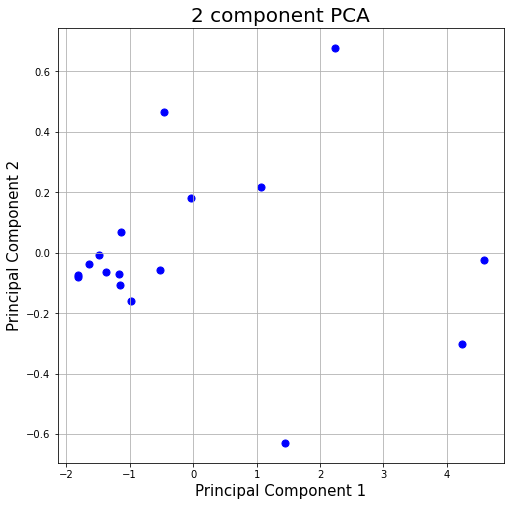

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

indicesToKeep = principal_defra_Df['y'] == y
ax.scatter(principal_defra_Df.loc[indicesToKeep, 'principal component 1']
               , principal_defra_Df.loc[indicesToKeep, 'principal component 2']
               , c = 'b'
               , s = 50)

ax.grid()



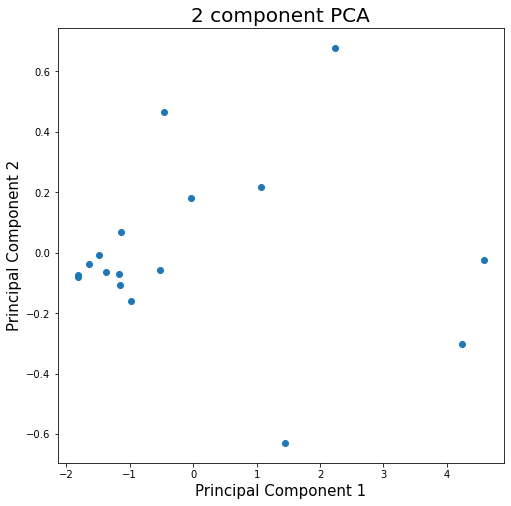

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

plt.scatter(principal_defra_Df['principal component 1'],principal_defra_Df['principal component 2'])
plt.show()